<a href="https://colab.research.google.com/github/voza95/100-days-of-python/blob/main/Algorithmic_Trading_Machine_Learning_Quant_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 857.1 kB/s eta 0:00:00


In [4]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=5792456a76309593f7fb3f8a7fa6f763b86938346a4b4ae12f867e028dca9323
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [6]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sn
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')
# import PyPortfolioOpt

In [14]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace(".", "-")
symbol_list = sp500['Symbol'].unique().tolist()
end_date = '2023-10-30'
start_date  = pd.to_datetime(end_date)-pd.DateOffset(365)

df = yf.download(tickers=symbol_list,
                 start=start_date,
                 end=end_date).stack()
df

[*********************100%%**********************]  503 of 503 completed


Adj Close       Close        High         Low        Open  \
Date                                                                          
2022-10-31 A     137.379456  138.350006  138.929993  137.350006  137.690002   
           AAL    14.180000   14.180000   14.320000   13.890000   14.030000   
           AAPL  152.235138  153.339996  154.240005  151.919998  153.160004   
           ABBV  140.715363  146.399994  146.779999  144.080002  145.169998   
           ABNB  106.910004  106.910004  113.800003  106.669998  113.059998   
...                     ...         ...         ...         ...         ...   
2023-10-27 YUM   118.877701  119.440002  120.250000  118.279999  119.040001   
           ZBH   103.190002  103.190002  104.809998  102.709999  104.000000   
           ZBRA  207.179993  207.179993  207.559998  201.160004  204.600006   
           ZION   29.095911   29.450001   30.670000   28.980000   30.590000   
           ZTS   155.657318  156.029999  157.929993  155.160004  157.929993   

                     Volume  
Date                         
2022-10-31 A      1307600.0  
           AAL   26486700.0  
           AAPL  97943200.0  
           ABBV   8604800.0  
           ABNB  10733800.0  
...                     ...  
2023-10-27 YUM    2331000.0  
           ZBH    1534500.0  
           ZBRA    565000.0  
           ZION   2498300.0  
           ZTS    2407100.0  

[125359 rows x 6 columns]

In [12]:
df = df.stack()
df

Date                      
2022-10-31  A    Adj Close    1.373794e+02
                 Close        1.383500e+02
                 High         1.389300e+02
                 Low          1.373500e+02
                 Open         1.376900e+02
                                  ...     
2023-10-27  ZTS  Close        1.560300e+02
                 High         1.579300e+02
                 Low          1.551600e+02
                 Open         1.579300e+02
                 Volume       2.407100e+06
Length: 752154, dtype: float64

In [15]:
df.index.names = ['date', 'ticker']
df

Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2022-10-31 A       137.379456  138.350006  138.929993  137.350006  137.690002   
           AAL      14.180000   14.180000   14.320000   13.890000   14.030000   
           AAPL    152.235138  153.339996  154.240005  151.919998  153.160004   
           ABBV    140.715363  146.399994  146.779999  144.080002  145.169998   
           ABNB    106.910004  106.910004  113.800003  106.669998  113.059998   
...                       ...         ...         ...         ...         ...   
2023-10-27 YUM     118.877701  119.440002  120.250000  118.279999  119.040001   
           ZBH     103.190002  103.190002  104.809998  102.709999  104.000000   
           ZBRA    207.179993  207.179993  207.559998  201.160004  204.600006   
           ZION     29.095911   29.450001   30.670000   28.980000   30.590000   
           ZTS     155.657318  156.029999  157.929993  155.160004  157.929993   

                       Volume  
date       ticker              
2022-10-31 A        1307600.0  
           AAL     26486700.0  
           AAPL    97943200.0  
           ABBV     8604800.0  
           ABNB    10733800.0  
...                       ...  
2023-10-27 YUM      2331000.0  
           ZBH      1534500.0  
           ZBRA      565000.0  
           ZION     2498300.0  
           ZTS      2407100.0  

[125359 rows x 6 columns]

In [16]:
df.columns = df.columns.str.lower()
df

adj close       close        high         low        open  \
date       ticker                                                               
2022-10-31 A       137.379456  138.350006  138.929993  137.350006  137.690002   
           AAL      14.180000   14.180000   14.320000   13.890000   14.030000   
           AAPL    152.235138  153.339996  154.240005  151.919998  153.160004   
           ABBV    140.715363  146.399994  146.779999  144.080002  145.169998   
           ABNB    106.910004  106.910004  113.800003  106.669998  113.059998   
...                       ...         ...         ...         ...         ...   
2023-10-27 YUM     118.877701  119.440002  120.250000  118.279999  119.040001   
           ZBH     103.190002  103.190002  104.809998  102.709999  104.000000   
           ZBRA    207.179993  207.179993  207.559998  201.160004  204.600006   
           ZION     29.095911   29.450001   30.670000   28.980000   30.590000   
           ZTS     155.657318  156.029999  157.929993  155.160004  157.929993   

                       volume  
date       ticker              
2022-10-31 A        1307600.0  
           AAL     26486700.0  
           AAPL    97943200.0  
           ABBV     8604800.0  
           ABNB    10733800.0  
...                       ...  
2023-10-27 YUM      2331000.0  
           ZBH      1534500.0  
           ZBRA      565000.0  
           ZION     2498300.0  
           ZTS      2407100.0  

[125359 rows x 6 columns]

# Calculate features and technical indicators for each stock.
* Garman-klass Volatility
* RSI
* Bollinger Bands
* ATR
* MACD
* Dollar Volume

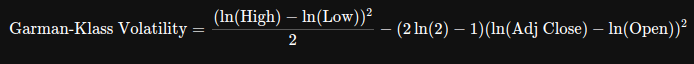